In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter('ignore')

In [2]:
data = pd.read_csv('application_record.csv', encoding='utf-8')
record = pd.read_csv('credit_record.csv', encoding='utf-8')

In [3]:
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [6]:
data.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [7]:
record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [8]:
record.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [9]:
# This function is used to count each unique value in a dataframe, which will then be sorted from smallest to largest
def unique_values(df):
    data = [(kolom, df[kolom].unique().shape[0]) for kolom in df.columns]
    df_unique = pd.DataFrame.from_records(data, 
                                          columns=['Columns_Name', 'Unique_Val']).sort_values(by=['Unique_Val'])
    return df_unique

In [10]:
unique_values(data)

,Columns_Name,Unique_Val
12,FLAG_MOBIL,1
1,CODE_GENDER,2
2,FLAG_OWN_CAR,2
3,FLAG_OWN_REALTY,2
15,FLAG_EMAIL,2
14,FLAG_PHONE,2
13,FLAG_WORK_PHONE,2
8,NAME_FAMILY_STATUS,5
6,NAME_INCOME_TYPE,5
7,NAME_EDUCATION_TYPE,5


## EDA

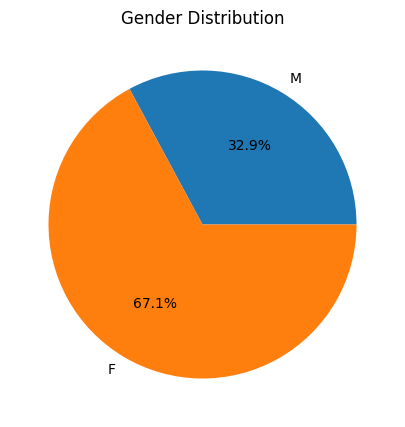

In [11]:
plt.figure(figsize=(7,5))
plt.pie([(data['CODE_GENDER'] == 'M').sum(), (data['CODE_GENDER'] == 'F').sum()], 
        labels=data['CODE_GENDER'].unique(), autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

As can be seen in the pie chart above, there are more female users

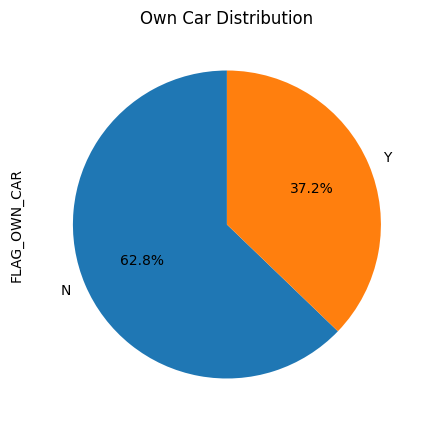

In [12]:
fig1 = data['FLAG_OWN_CAR'].value_counts().plot(kind='pie', startangle=90, title='Own Car Distribution',
                                              figsize=(7,5), autopct='%1.1f%%')

And more people own cars.

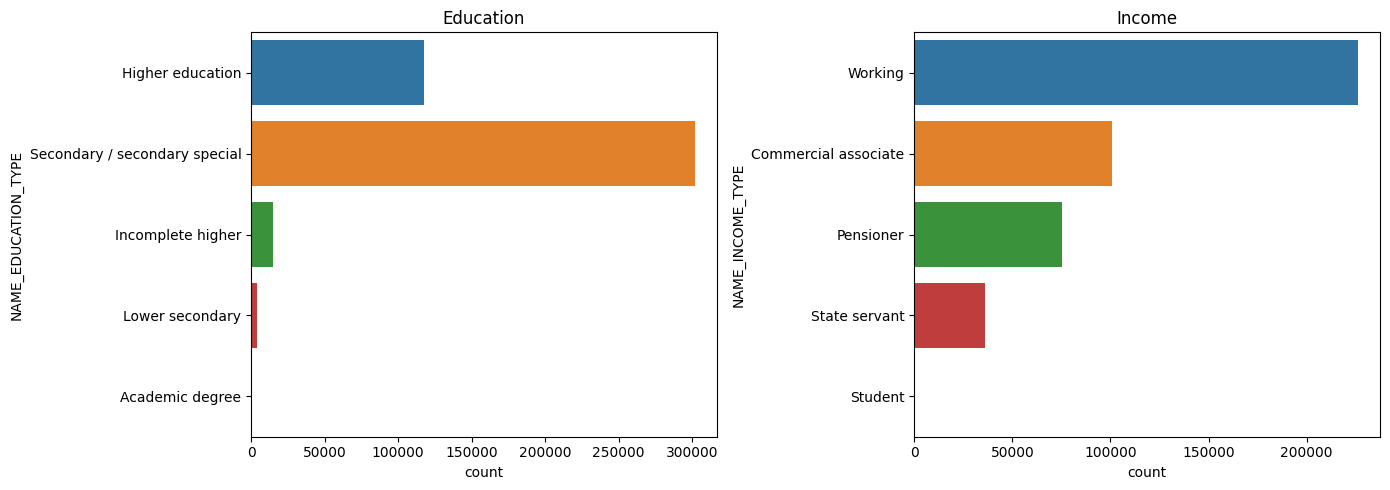

In [13]:
fig2, axes = plt.subplots(1,2)
# subplot 1
f1 = sns.countplot(y = data['NAME_EDUCATION_TYPE'], ax=axes[0])
f1.set_title('Education')

# subplot 2
f2 = sns.countplot(y = data['NAME_INCOME_TYPE'], ax=axes[1])
f2.set_title('Income')

fig2.set_size_inches(14,5)
plt.tight_layout()
plt.show()

It turns out that the data shows that more users have a high school education or equivalent, while the majority of their income comes from work

In [14]:
data['OCCUPATION_TYPE'].unique()

array([nan, 'Security staff', 'Sales staff', 'Accountants', 'Laborers',
       'Managers', 'Drivers', 'Core staff', 'High skill tech staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Low-skill Laborers', 'Medicine staff', 'Secretaries',
       'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'],
      dtype=object)

In [15]:
data.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [16]:
data['OCCUPATION_TYPE'].isnull().sum()/data['OCCUPATION_TYPE'].shape[0]
# sekitar 30% null

0.30601039317580153

Since the null data in the 'OCCUPATION TYPE' column is quite large, around 30%, it is not logical to replace it with something else because it will not be valid if we try to replace it with the mode of that column.

In [17]:
data.drop(columns=['OCCUPATION_TYPE'], axis=1, inplace=True)

In [18]:
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0


In [19]:
# Rename the column to make it easier to understand
data.rename(columns={'CODE_GENDER':'gender',
                     'FLAG_OWN_CAR':'own_car',"FLAG_OWN_REALTY":"own_realty",
                     "CNT_CHILDREN":"children_count",
                     "AMT_INCOME_TOTAL":"income",
                     "NAME_EDUCATION_TYPE":"education",
                     "NAME_FAMILY_STATUS":"family_status",
                     "NAME_HOUSING_TYPE":"housing_type",
                     "DAYS_BIRTH":"birthday",
                     "DAYS_EMPLOYED":"employment_date",
                     "FLAG_MOBIL":"own_mobile",
                     "FLAG_WORK_PHONE":"own_work_phone",
                     "FLAG_PHONE":"own_phone",
                     "FLAG_EMAIL":"own_email",
                     "CNT_FAM_MEMBERS":"family_member_count",
                     "NAME_INCOME_TYPE":"income_type"},
           inplace=True)

In [20]:
record

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [21]:
# buat tabel u/ mengetahui sudah berapa lama klien menggunakan kredit 
# 0 = 0 bulan, -1 = 1 bulan, dst ...
open_mounth = pd.DataFrame(record.groupby(['ID'])['MONTHS_BALANCE'].agg(min))
open_mounth.rename(columns={'MONTHS_BALANCE':'begin_mounth'}, inplace=True)
open_mounth.head()

,begin_mounth
ID,
5001711,-3
5001712,-18
5001713,-21
5001714,-14
5001715,-59


Since the dataframe records the status value of each user's conversation, if we take the minimum value of the month balance for each user, we can determine when the user actually started using the credit card/how many months users have been using credit card (0 = 0 months, -1 = 1 month, -2 = 2 months, etc.

In [22]:
# join kedua tabel dengan left supaya hanya klien yang datanya lengkap saja yang tampil
# maksud data lengkap berarti ada di tabel data
data = pd.merge(data, open_mounth, how='left', on='ID')
data.head()

,ID,gender,own_car,own_realty,children_count,income,income_type,education,family_status,housing_type,birthday,employment_date,own_mobile,own_work_phone,own_phone,own_email,family_member_count,begin_mounth
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-15.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-14.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,2.0,-29.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0,-4.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0,-26.0


Next, we join the data and record tables to add a variable that shows how long the user has been using the credit card. We use a left join (left = data) because we only want to use users who have complete data. Since the data dataframe has more matrices, we use a left join.

## Feature Engineering

This is a fairly long process consisting of several stages. Here, we will extract the existing features/convert categorical data into numerical data so that it will be easier for the model to understand the data we input. Then, we also determine which features are worthy to be used/have an impact on the target. We also perform data transformation to speed up the model creation process because it is within a fixed data range.

In [23]:
count_unique = unique_values(data)
count_unique

,Columns_Name,Unique_Val
12,own_mobile,1
1,gender,2
2,own_car,2
3,own_realty,2
15,own_email,2
14,own_phone,2
13,own_work_phone,2
8,family_status,5
6,income_type,5
7,education,5


### One hot encoding

First, we have data that only has two values, namely Yes and No, as well as Female and Male or Nominal data because we can't rank then. It is better to convert this data into numerical data because the model will perform better when receiving a vector that contains numbers.

In [24]:
data.head()

,ID,gender,own_car,own_realty,children_count,income,income_type,education,family_status,housing_type,birthday,employment_date,own_mobile,own_work_phone,own_phone,own_email,family_member_count,begin_mounth
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-15.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-14.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,2.0,-29.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0,-4.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0,-26.0


In [25]:
data['gender'].replace(['F', 'M'], [0, 1], inplace=True)
data['own_car'].replace(['Y', 'N'], [0, 1], inplace=True)
data['own_realty'].replace(['Y', 'N'], [0, 1], inplace=True)

### Label encoding

Then we have categorical Ordinal data, which is data that we can rank, so it is better to convert this data into numerical data. In the process below, the higher the ranking, the higher the number it will receive.

In [26]:
# 0 = todak memiliki penghasilan, 1 = memilki penghasilan`
data["is_working"] = data["income_type"].replace(["Working","Commercial associate",
                                              "State servant","Pensioner","Student"],[1,1,1,0,0])

# 0 = tidak memiliki pasangan secara resmi, 1 = memiliki pasangan secara resmi
data["family_status"] = data["family_status"].replace(["Civil marriage","Married","Single / not married",
                                                     "Separated","Widow"],[1,1,0,0,0])
# 0 = tidak mempunyai tempat tinggal, 1 = mempunyai tempat tinggal
data["housing_type"] = data["housing_type"].replace(["House / apartment","With parents","Municipal apartment",
                                                "Rented apartment","Office apartment","Co-op apartment"],
                                                [1,0,1,1,1,1])
# semakin besar numeric semakin tinggi tingkat pendidikan
data["education"] = data["education"].replace(["Secondary / secondary special","Lower secondary","Higher education",
                                          "Incomplete higher","Academic degree"],[0,0,1,1,2])

data["in_relationship"] = data["family_status"]

### Data Transformation

In this stage, we will change the range of the existing data so that the standard deviation of variables with a large range will not affect the model. This is because it will not be valid if later the data is compared to data that has a small standard deviation, even though the feature itself is quite influential.

In [27]:
# ubah birthday menjadi umur, -1 berarti kemarin
data[['birthday']].head()

,birthday
0,-12005
1,-12005
2,-21474
3,-19110
4,-19110


In [28]:
# bagi saja dengan -365 untuk mendapatkan umur dalam tahun
data['age'] = round(data['birthday']/-365)

In [29]:
data.head()

,ID,gender,own_car,own_realty,children_count,income,income_type,education,family_status,housing_type,...,employment_date,own_mobile,own_work_phone,own_phone,own_email,family_member_count,begin_mounth,is_working,in_relationship,age
0,5008804,1,0,0,0,427500.0,Working,1,1,1,...,-4542,1,1,0,0,2.0,-15.0,1,1,33.0
1,5008805,1,0,0,0,427500.0,Working,1,1,1,...,-4542,1,1,0,0,2.0,-14.0,1,1,33.0
2,5008806,1,0,0,0,112500.0,Working,0,1,1,...,-1134,1,0,0,0,2.0,-29.0,1,1,59.0
3,5008808,0,1,0,0,270000.0,Commercial associate,0,0,1,...,-3051,1,0,1,1,1.0,-4.0,1,0,52.0
4,5008809,0,1,0,0,270000.0,Commercial associate,0,0,1,...,-3051,1,0,1,1,1.0,-26.0,1,0,52.0


In [30]:
# ubah juga pengalaman bekerja ke tahun
data[['employment_date']].head()

,employment_date
0,-4542
1,-4542
2,-1134
3,-3051
4,-3051


In [31]:
# sama seperti di atas, tetapi berbeda cara
data['experience'] = data['employment_date'].apply(lambda x: round(x/-365) if x < 0 else 0)

In [32]:
data.head()

,ID,gender,own_car,own_realty,children_count,income,income_type,education,family_status,housing_type,...,own_mobile,own_work_phone,own_phone,own_email,family_member_count,begin_mounth,is_working,in_relationship,age,experience
0,5008804,1,0,0,0,427500.0,Working,1,1,1,...,1,1,0,0,2.0,-15.0,1,1,33.0,12
1,5008805,1,0,0,0,427500.0,Working,1,1,1,...,1,1,0,0,2.0,-14.0,1,1,33.0,12
2,5008806,1,0,0,0,112500.0,Working,0,1,1,...,1,0,0,0,2.0,-29.0,1,1,59.0,3
3,5008808,0,1,0,0,270000.0,Commercial associate,0,0,1,...,1,0,1,1,1.0,-4.0,1,0,52.0,8
4,5008809,0,1,0,0,270000.0,Commercial associate,0,0,1,...,1,0,1,1,1.0,-26.0,1,0,52.0,8


The code above converts the values of the birthday and employment_date fields, which represent the user's date of birth (in days) and start date of employment (in days), respectively, into years to facilitate the creation of the model later on.

In [33]:
data['family_member_count'] 

0         2.0
1         2.0
2         2.0
3         1.0
4         1.0
         ... 
438552    1.0
438553    1.0
438554    1.0
438555    2.0
438556    2.0
Name: family_member_count, Length: 438557, dtype: float64

In [34]:
# family_status = 1 (suami-istri) else (tidak lengkap)
# jadi untuk menghitung berapa anggota keluarga = jumlah anak + jumlah orang tua
data['household_size'] = data['children_count'] + data['family_status'].apply(lambda x: 2 if x==1 else 1)

In [35]:
data

,ID,gender,own_car,own_realty,children_count,income,income_type,education,family_status,housing_type,...,own_work_phone,own_phone,own_email,family_member_count,begin_mounth,is_working,in_relationship,age,experience,household_size
0,5008804,1,0,0,0,427500.0,Working,1,1,1,...,1,0,0,2.0,-15.0,1,1,33.0,12,2
1,5008805,1,0,0,0,427500.0,Working,1,1,1,...,1,0,0,2.0,-14.0,1,1,33.0,12,2
2,5008806,1,0,0,0,112500.0,Working,0,1,1,...,0,0,0,2.0,-29.0,1,1,59.0,3,2
3,5008808,0,1,0,0,270000.0,Commercial associate,0,0,1,...,0,1,1,1.0,-4.0,1,0,52.0,8,1
4,5008809,0,1,0,0,270000.0,Commercial associate,0,0,1,...,0,1,1,1.0,-26.0,1,0,52.0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,1,1,0,0,135000.0,Pensioner,0,0,1,...,0,0,0,1.0,NaN,0,0,62.0,0,1
438553,6840222,0,1,1,0,103500.0,Working,0,0,1,...,0,0,0,1.0,NaN,1,0,44.0,8,1
438554,6841878,0,1,1,0,54000.0,Commercial associate,1,0,0,...,1,0,0,1.0,NaN,1,0,22.0,1,1
438555,6842765,0,1,0,0,72000.0,Pensioner,0,1,1,...,0,0,0,2.0,NaN,0,1,59.0,0,2


## Removing Outliers

 Menggunakan z score biasa dengan persamaan:

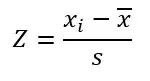

If the z-score value after normalization is greater than 3 or less than -3, it will be considered as an outlier because the value is very far from the mean by 3 standard deviations (extreme).

[]

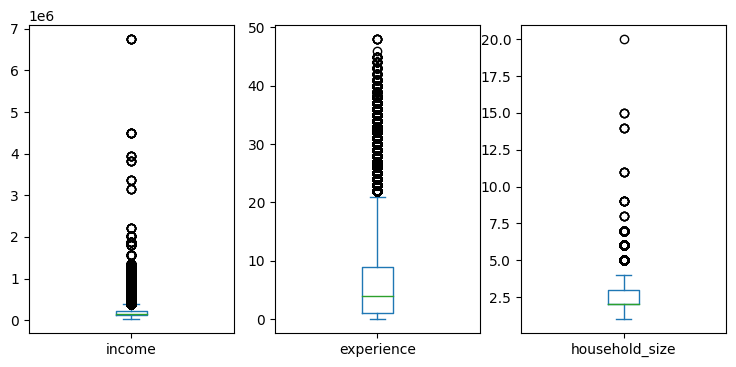

In [36]:
cols = ['income', 'experience', 'household_size']

fig, axs = plt.subplots(ncols=3)
fig.set_size_inches(9, 4)
for i, col in enumerate(cols):
    data[col].plot(kind='box', ax=axs[i])
plt.plot()

In [37]:
def remove_outliers_zscore(data, cols):
    for i in cols:
        data[i+'_zscore'] = (data[i] - data[i].mean())/data[i].std() # hitung nilai z score
        data = data[(data[i+'_zscore'] > -3) & (data[i+'_zscore'] < 3)] # drop baris yang nilai z-score-nya < -3 atau > 3
        data.drop(columns=[i+'_zscore'], axis=1, inplace=True) # drop kolom z score
    return data

In [38]:
# hitung z score untuk numeric data
data = remove_outliers_zscore(data, cols)
data.head()

,ID,gender,own_car,own_realty,children_count,income,income_type,education,family_status,housing_type,...,own_work_phone,own_phone,own_email,family_member_count,begin_mounth,is_working,in_relationship,age,experience,household_size
0,5008804,1,0,0,0,427500.0,Working,1,1,1,...,1,0,0,2.0,-15.0,1,1,33.0,12,2
1,5008805,1,0,0,0,427500.0,Working,1,1,1,...,1,0,0,2.0,-14.0,1,1,33.0,12,2
2,5008806,1,0,0,0,112500.0,Working,0,1,1,...,0,0,0,2.0,-29.0,1,1,59.0,3,2
3,5008808,0,1,0,0,270000.0,Commercial associate,0,0,1,...,0,1,1,1.0,-4.0,1,0,52.0,8,1
4,5008809,0,1,0,0,270000.0,Commercial associate,0,0,1,...,0,1,1,1.0,-26.0,1,0,52.0,8,1


[]

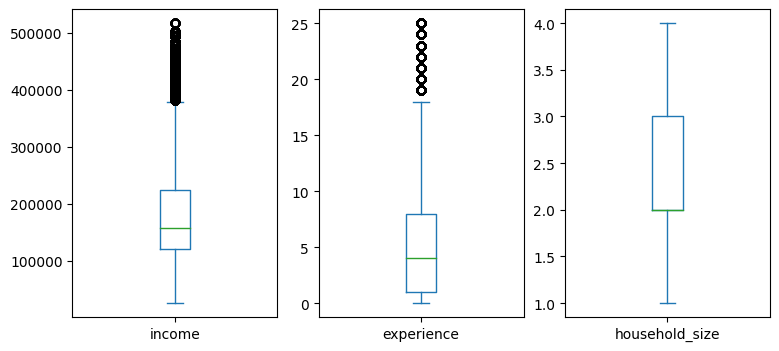

In [39]:
cols = ['income', 'experience', 'household_size']

fig, axs = plt.subplots(ncols=3)
fig.set_size_inches(9, 4)
for i, col in enumerate(cols):
    data[col].plot(kind='box', ax=axs[i])
plt.plot()

## Handling record

In [40]:
# 0: Terlambat bayar 1-29 hari
# 1: Terlambat bayar 30-59 hari
# 2: Terlambat bayar 60-89 hari
# 3: Terlambat bayar 90-119 hari
# 4: Terlambat bayar 120-149 hari
# 5: Terlambat bayar atau hutang buruk, write-off lebih dari 150 hari
# C: Lunas pada bulan tersebut
# X: Tidak ada pinjaman untuk bulan tersebut.
record

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [41]:
# buat kolom dep_value
record['dep_value'] = None
# baris pada kolom dep_value akan diisi YES jika baris pada kolom STATUS bernilai 2/3/4/5
# pengguna berisiko jika terlambat lebih dari 60 hari (apakah berisiko? YES)
# jadi, jika pada kolom STATUS terdapat nilai lebih dari 2 maka dianggap berisik0
record['dep_value'][record['STATUS'] =='2']='Yes' 
record['dep_value'][record['STATUS'] =='3']='Yes' 
record['dep_value'][record['STATUS'] =='4']='Yes' 
record['dep_value'][record['STATUS'] =='5']='Yes'

The DEP value in credit stands for Debt Service Coverage Ratio, which is a ratio used by lenders to measure a borrower's ability to repay their debts. It is assumed that if a user is late in paying their credit for more than or equal to 2 months, then that person will be considered quite vulnerable (given a value of YES).

In [42]:
# kelompokkan berdasarkan ID, dan isi kolom dep_value sesuai dengan jumlah baris dari ID
# dep value bernilai 0 berarti tidak pernah telat membayar lebih dari 60 hari, bisa ditoleransi (tidak masuk ke dalam YES pada dep_value)
record_count = record.groupby('ID').count()
record_count.head()

,MONTHS_BALANCE,STATUS,dep_value
ID,,,
5001711,4,4,0
5001712,19,19,0
5001713,22,22,0
5001714,15,15,0
5001715,60,60,0


In [43]:
# setelah dikelompokkan, apabila baris pada kolom dep_value bernilai = 0 maka nilai dep_value menjadi No
# apabila lebih dari 0 maka menjadi Yes
record_count['dep_value'][record_count['dep_value'] > 0] = 'Yes'
record_count['dep_value'][record_count['dep_value'] == 0] = 'No'

In [44]:
record_count = record_count.drop(columns=['MONTHS_BALANCE', 'STATUS'])
record_count

,dep_value
ID,
5001711,No
5001712,No
5001713,No
5001714,No
5001715,No
...,...
5150482,No
5150483,No
5150484,No


Finally, We can obtain a table that shows the user's ability to pay credit more clearly

In [45]:
record.head()

,ID,MONTHS_BALANCE,STATUS,dep_value
0,5001711,0,X,None
1,5001711,-1,0,None
2,5001711,-2,0,None
3,5001711,-3,0,None
4,5001712,0,C,None


In [46]:
# tabel grouped digunakan untuk mengelompokkan user berdasarkan ID yang mana nantinya akan digunakan dalam penentuan fitur baru
# seperti membuat fitur start_month, yaitu kapan user memulai menggunakan kartu kredit (aggregatekan MONTHS_BALANCE dengan min)
grouped = record.groupby('ID')
# tabel pivot_tbl digunakan untuk melihat apa status credit user dalam tiap bulan yang ada
pivot_tbl = record.pivot(index='ID', columns='MONTHS_BALANCE', values='STATUS')

In [47]:
grouped.size()

ID
5001711     4
5001712    19
5001713    22
5001714    15
5001715    60
           ..
5150482    18
5150483    18
5150484    13
5150485     2
5150487    30
Length: 45985, dtype: int64

In [48]:
pivot_tbl

MONTHS_BALANCE,-60,-59,-58,-57,-56,-55,-54,-53,-52,-51,...,-9,-8,-7,-6,-5,-4,-3,-2,-1,0
ID,,,,,,,,,,,,,,,,,,,,,
5001711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,X
5001712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,C,C,C,C,C,C,C,C,C
5001713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,X,X,X,X,X,X,X,X,X
5001714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,X,X,X,X,X,X,X,X,X
5001715,NaN,X,X,X,X,X,X,X,X,X,...,X,X,X,X,X,X,X,X,X,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5150482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5150483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,X,X,X,X,X,X,X,X,X
5150484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,C


In [49]:
# 0: Terlambat bayar 1-29 hari
# 1: Terlambat bayar 30-59 hari
# 2: Terlambat bayar 60-89 hari
# 3: Terlambat bayar 90-119 hari
# 4: Terlambat bayar 120-149 hari
# 5: Terlambat bayar atau hutang buruk, write-off lebih dari 150 hari
# C: Lunas pada bulan tersebut
# X: Tidak ada pinjaman untuk bulan tersebut.

In [50]:
grouped['MONTHS_BALANCE'].min()

ID
5001711    -3
5001712   -18
5001713   -21
5001714   -14
5001715   -59
           ..
5150482   -28
5150483   -17
5150484   -12
5150485    -1
5150487   -29
Name: MONTHS_BALANCE, Length: 45985, dtype: int64

In [51]:
pivot_tbl['start_month'] = grouped['MONTHS_BALANCE'].min() # kapan user mulai memakai kartu kredit
pivot_tbl['end_month'] = grouped['MONTHS_BALANCE'].max() # kapan user terakhir memakai kartu kredit
pivot_tbl['durations'] = pivot_tbl['end_month'] - pivot_tbl['start_month'] + 1 # seberapa lama user sudah memakai kartu kredit

# kode-kode di bawah digunakan untuk menghitung seberapa banyak user telat membayar dalam rentang 29 hari
pivot_tbl['telat_1-29'] = pivot_tbl[pivot_tbl.iloc[:,0:61] == '0'].count(axis=1)
pivot_tbl['telat_30-59'] = pivot_tbl[pivot_tbl.iloc[:,0:61] == '1'].count(axis=1)
pivot_tbl['telat_60-89'] = pivot_tbl[pivot_tbl.iloc[:,0:61] == '2'].count(axis=1)
pivot_tbl['telat_90-119'] = pivot_tbl[pivot_tbl.iloc[:,0:61] == '3'].count(axis=1)
pivot_tbl['telat_120-149'] = pivot_tbl[pivot_tbl.iloc[:,0:61] == '4'].count(axis=1)
pivot_tbl['telat_lebih_150'] = pivot_tbl[pivot_tbl.iloc[:,0:61] == '5'].count(axis=1)
pivot_tbl['lunas'] = pivot_tbl[pivot_tbl.iloc[:,0:61] == 'C'].count(axis=1)
pivot_tbl['tidak_credit'] = pivot_tbl[pivot_tbl.iloc[:,0:61] == 'X'].count(axis=1)

In [52]:
pivot_tbl.head()

MONTHS_BALANCE,-60,-59,-58,-57,-56,-55,-54,-53,-52,-51,...,end_month,durations,telat_1-29,telat_30-59,telat_60-89,telat_90-119,telat_120-149,telat_lebih_150,lunas,tidak_credit
ID,,,,,,,,,,,,,,,,,,,,,
5001711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,4,3,0,0,0,0,0,0,1
5001712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,19,10,0,0,0,0,0,9,0
5001713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,22,0,0,0,0,0,0,0,22
5001714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,15,0,0,0,0,0,0,0,15
5001715,NaN,X,X,X,X,X,X,X,X,X,...,0,60,0,0,0,0,0,0,0,60


Let's obtain a new pivot_tbl table with additional features, including the user's status during a certain month -60 months to 0 months, when the user started using the credit card, the last time the user used the credit card, and the duration (in months). It will also be indicated how many times the user was late in paying within a duration of 29 days, etc.

In [53]:
target = pd.DataFrame()

In [54]:
col_copy = np.array(pivot_tbl.columns)[-2:]
target[col_copy] = pivot_tbl[col_copy]
target['jumlah_telat'] = pivot_tbl.iloc[:,-3] + pivot_tbl.iloc[:,-4] + pivot_tbl.iloc[:,-5] + pivot_tbl.iloc[:,-6] + pivot_tbl.iloc[:,-7] + pivot_tbl.iloc[:,-8]

In [55]:
target.head()

,lunas,tidak_credit,jumlah_telat
ID,,,
5001711,0,1,3
5001712,9,0,10
5001713,0,22,0
5001714,0,15,0
5001715,0,60,0


To facilitate the observation of user behavior, we create a target table that records how many users have paid off their debts, do not use credit, and are late in paying.

In [56]:
data1 = data.merge(target, how='inner', on='ID')
data1.head()

,ID,gender,own_car,own_realty,children_count,income,income_type,education,family_status,housing_type,...,family_member_count,begin_mounth,is_working,in_relationship,age,experience,household_size,lunas,tidak_credit,jumlah_telat
0,5008804,1,0,0,0,427500.0,Working,1,1,1,...,2.0,-15.0,1,1,33.0,12,2,13,1,2
1,5008805,1,0,0,0,427500.0,Working,1,1,1,...,2.0,-14.0,1,1,33.0,12,2,12,1,2
2,5008806,1,0,0,0,112500.0,Working,0,1,1,...,2.0,-29.0,1,1,59.0,3,2,7,16,7
3,5008808,0,1,0,0,270000.0,Commercial associate,0,0,1,...,1.0,-4.0,1,0,52.0,8,1,0,3,2
4,5008809,0,1,0,0,270000.0,Commercial associate,0,0,1,...,1.0,-26.0,1,0,52.0,8,1,0,5,0


In [57]:
data2 = data1.merge(record_count, how='inner', on='ID')
data2.rename({'dep_value':'target'}, inplace=True, axis=1)
data2['target'] = data2['target'].apply(lambda x: 1 if x == 'Yes' else 0)
data2.drop(columns=['income_type'], inplace=True)
data2.head()

,ID,gender,own_car,own_realty,children_count,income,education,family_status,housing_type,birthday,...,begin_mounth,is_working,in_relationship,age,experience,household_size,lunas,tidak_credit,jumlah_telat,target
0,5008804,1,0,0,0,427500.0,1,1,1,-12005,...,-15.0,1,1,33.0,12,2,13,1,2,0
1,5008805,1,0,0,0,427500.0,1,1,1,-12005,...,-14.0,1,1,33.0,12,2,12,1,2,0
2,5008806,1,0,0,0,112500.0,0,1,1,-21474,...,-29.0,1,1,59.0,3,2,7,16,7,0
3,5008808,0,1,0,0,270000.0,0,0,1,-19110,...,-4.0,1,0,52.0,8,1,0,3,2,0
4,5008809,0,1,0,0,270000.0,0,0,1,-19110,...,-26.0,1,0,52.0,8,1,0,5,0,0


And finally, a new dataframe is obtained that already has a target column, which is 1 if the user is at risk and 0 if not

In [58]:
data2['target'].value_counts()

0    34202
1      590
Name: target, dtype: int64

It can be seen that the current dataset is imbalanced because we have more records of users who are not at risk than those who are at risk

## Feature selection
Memmilih feature apa saja yang layak dijadikan variabel untuk memprediksi target

### Mutual Information
First, we will use Mutual Information (MI) to select which features can be effectively used in predicting the target. MI is used to measure the relationship or dependence between two random variables. In this context, it means how informative a feature is in predicting the target, the larger the value, the more informative it is.

In [59]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
X = data2.drop(['target'], axis=1)     
Y = data2['target']
mutual_info = mutual_info_classif(X, Y)
mutual_info

array([0.01643913, 0.0006631 , 0.00184158, 0.00171751, 0.00059374,
       0.00159256, 0.00044532, 0.00420523, 0.00740299, 0.01883492,
       0.01120895, 0.00669996, 0.0001385 , 0.00114603, 0.        ,
       0.00100585, 0.00270275, 0.00564138, 0.00456533, 0.00192767,
       0.00053033, 0.00256182, 0.00078228, 0.00092345, 0.0101792 ])

In [60]:
myvar = X.columns
sort_mi = pd.DataFrame({
    'Variable':myvar,
    'MI':mutual_info
}).sort_values(by=['MI'],ascending=False)
sort_mi.set_index('Variable', inplace=True)
sort_mi

,MI
Variable,
birthday,0.018835
ID,0.016439
employment_date,0.011209
jumlah_telat,0.010179
housing_type,0.007403
own_mobile,0.006700
is_working,0.005641
in_relationship,0.004565
family_status,0.004205


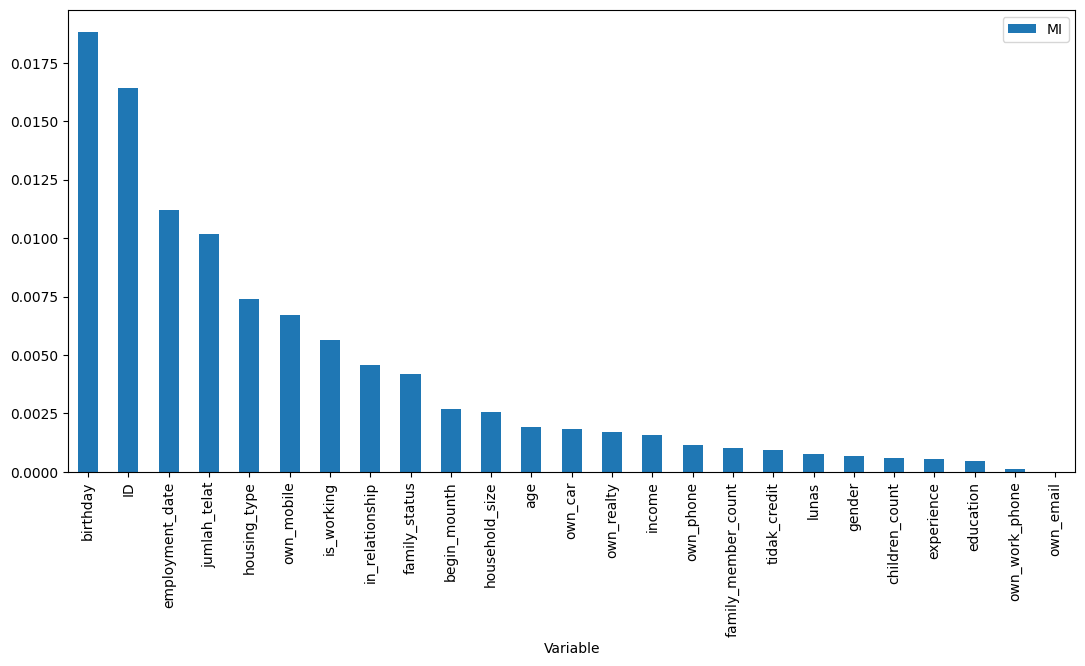

In [61]:
sort_mi.plot(kind='bar', figsize=(13,6))
plt.show()

Seperti yang bisa dilihat di atas, feature selection dengan menggunakan MI cukup buruk karena menghasilkan nilai MI yang sangat kecil untuk tiap feature terhadap target

### Information Value

Secondly, we use Information Value (IV) to determine which features are worth using in feature selection. The concept of IV comes from information theory and data processing. IV can be calculated by computing the difference between the frequency distribution of the feature in each category and the frequency distribution of the target in each category. The IV value is calculated by summing up these differences for all categories and converted into a logarithmic scale. The larger the IV value, the more information is provided by the feature in predicting the target variable.

In [62]:
# remember (Yes = 0, No = 1)
def calc_woe_iv(feature, target):
    df1 = pd.DataFrame({"feature": feature, "target":target})
    justmiss = df1[df1.feature.isnull()][['feature', 'target']]
    notmiss = df1[df1.feature.notnull()][['feature', 'target']]
    
    df2 = notmiss.groupby('feature', as_index=True)
    
    df3 = pd.DataFrame({}, index=[])
    df3['No'] = df2.sum()['target']
    df3["Yes"] = df2.count()['target'] - df2.sum()['target']
    df3['All'] = df2.count()['target']
    df3['Value'] = feature.unique()
    df3['Variable'] = feature.name
   
    
    if len(justmiss.index) > 0:
        df4 = pd.DataFrame({},index=[0])
        df4["All"] = justmiss.count()['target']
        df4["No"] = justmiss.sum()['target']
        df4["Yes"] = justmiss.count()['target'] - justmiss.sum()['target']
        df4['Value'] = feature.unique()
        df4['Variable'] = feature.name
        df3 = df3.append(df4,ignore_index=True)
        
    df3['No %'] = df3['No']/df3.sum()['No']
    df3['Yes %'] = df3['Yes']/df3.sum()['Yes']
    df3['Population %'] = df3['All']/df3.sum()['All']
    df3['WOE'] = np.log(df3['Yes %']/df3['No %'])
    df3["IV"] = (df3['Yes %']-df3['No %'])*df3['WOE']
    df3 = df3.replace([np.inf, -np.inf], 0)
    df5 = pd.DataFrame({"Variable":feature.name,
                        "Value":"Total",
                        "No": df3.sum()['No'],
                       "Yes": df3.sum()['Yes'],
                       "All": df3.sum()['All'],
                       "No %": df3['No %'].sum(),
                       "Yes %": df3['Yes %'].sum(),
                       'Population %': df3['Population %'].sum(),
                       'WOE': (df3['WOE'].abs()).sum(),
                       'IV': df3['IV'].sum()}, index=[0])
    df3 = df3.append(df5, ignore_index=True)
    df3 = df3[['Variable', 'Value','No', 'Yes', 'All', 'No %', 'Yes %', 'Population %', 'WOE', 'IV']]
    
    iv = df3.iloc[-1,-1]
    var = feature.name
    return df3, iv, var

In [63]:
mydict = {}
data2.columns

Index(['ID', 'gender', 'own_car', 'own_realty', 'children_count', 'income',
       'education', 'family_status', 'housing_type', 'birthday',
       'employment_date', 'own_mobile', 'own_work_phone', 'own_phone',
       'own_email', 'family_member_count', 'begin_mounth', 'is_working',
       'in_relationship', 'age', 'experience', 'household_size', 'lunas',
       'tidak_credit', 'jumlah_telat', 'target'],
      dtype='object')

In [64]:
df, iv, var = calc_woe_iv(data2['gender'], data2['target'])
mydict[var] = iv
df

,Variable,Value,No,Yes,All,No %,Yes %,Population %,WOE,IV
0,gender,1,359,22868,23227,0.608475,0.668616,0.667596,0.094255,0.005669
1,gender,0,231,11334,11565,0.391525,0.331384,0.332404,-0.166772,0.010030
2,gender,Total,590,34202,34792,1.000000,1.000000,1.000000,0.261027,0.015698


In [65]:
df, iv, var = calc_woe_iv(data2['own_car'], data2['target'])
mydict[var] = iv
df

,Variable,Value,No,Yes,All,No %,Yes %,Population %,WOE,IV
0,own_car,0,219,12968,13187,0.371186,0.379159,0.379024,0.021251,0.000169
1,own_car,1,371,21234,21605,0.628814,0.620841,0.620976,-0.012760,0.000102
2,own_car,Total,590,34202,34792,1.000000,1.000000,1.000000,0.034011,0.000271


In [66]:
df, iv, var = calc_woe_iv(data2['own_realty'], data2['target'])
mydict[var] = iv
df

,Variable,Value,No,Yes,All,No %,Yes %,Population %,WOE,IV
0,own_realty,0,348,22957,23305,0.589831,0.671218,0.669838,0.129259,0.010520
1,own_realty,1,242,11245,11487,0.410169,0.328782,0.330162,-0.221176,0.018001
2,own_realty,Total,590,34202,34792,1.000000,1.000000,1.000000,0.350435,0.028521


In [67]:
df, iv, var = calc_woe_iv(data2['children_count'], data2['target'])
mydict[var] = iv
df

,Variable,Value,No,Yes,All,No %,Yes %,Population %,WOE,IV
0,children_count,0,422,23858,24280,0.715254,0.697562,0.697862,-0.025047,0.000443
1,children_count,1,117,7180,7297,0.198305,0.209929,0.209732,0.056964,0.000662
2,children_count,2,51,3136,3187,0.086441,0.091691,0.091602,0.058961,0.000310
3,children_count,3,0,28,28,0.000000,0.000819,0.000805,0.000000,0.000000
4,children_count,Total,590,34202,34792,1.000000,1.000000,1.000000,0.140972,0.001415


In [68]:
df, iv, var = calc_woe_iv(data2['income'], data2['target'])
mydict[var] = iv
df

,Variable,Value,No,Yes,All,No %,Yes %,Population %,WOE,IV
0,income,427500.0,0,3,3,0.000000,0.000088,0.000086,0.000000,0.000000
1,income,112500.0,0,7,7,0.000000,0.000205,0.000201,0.000000,0.000000
2,income,270000.0,0,3,3,0.000000,0.000088,0.000086,0.000000,0.000000
3,income,283500.0,0,16,16,0.000000,0.000468,0.000460,0.000000,0.000000
4,income,135000.0,0,3,3,0.000000,0.000088,0.000086,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
230,income,150750.0,0,2,2,0.000000,0.000058,0.000057,0.000000,0.000000
231,income,116100.0,1,15,16,0.001695,0.000439,0.000460,-1.351867,0.001698
232,income,215100.0,0,43,43,0.000000,0.001257,0.001236,0.000000,0.000000
233,income,179271.0,0,8,8,0.000000,0.000234,0.000230,0.000000,0.000000


In [69]:
df, iv, var = calc_woe_iv(data2['experience'], data2['target'])
mydict[var] = iv
df

,Variable,Value,No,Yes,All,No %,Yes %,Population %,WOE,IV
0,experience,12,138,6864,7002,0.233898,0.200690,0.201253,-0.153125,5.085016e-03
1,experience,3,64,3080,3144,0.108475,0.090053,0.090366,-0.186115,3.428493e-03
2,experience,8,63,2824,2887,0.106780,0.082568,0.082979,-0.257142,6.225765e-03
3,experience,0,47,2787,2834,0.079661,0.081486,0.081456,0.022657,4.135833e-05
4,experience,2,41,2716,2757,0.069492,0.079411,0.079242,0.133427,1.323463e-03
5,experience,4,39,2258,2297,0.066102,0.066020,0.066021,-0.001244,1.021926e-07
6,experience,6,38,1963,2001,0.064407,0.057394,0.057513,-0.115274,8.083549e-04
7,experience,9,23,1886,1909,0.038983,0.055143,0.054869,0.346802,5.604300e-03
8,experience,19,27,1657,1684,0.045763,0.048447,0.048402,0.057010,1.530582e-04
9,experience,15,19,1511,1530,0.032203,0.044179,0.043976,0.316171,3.786248e-03


In [70]:
df, iv, var = calc_woe_iv(data2['education'], data2['target'])
mydict[var] = iv
df

,Variable,Value,No,Yes,All,No %,Yes %,Population %,WOE,IV
0,education,1,392,23676,24068,0.664407,0.692240,0.691768,0.041038,0.001142
1,education,0,198,10494,10692,0.335593,0.306824,0.307312,-0.089625,0.002578
2,education,2,0,32,32,0.000000,0.000936,0.000920,0.000000,0.000000
3,education,Total,590,34202,34792,1.000000,1.000000,1.000000,0.130663,0.003721


In [71]:
df, iv, var = calc_woe_iv(data2['family_status'], data2['target'])
mydict[var] = iv
df

,Variable,Value,No,Yes,All,No %,Yes %,Population %,WOE,IV
0,family_status,1,171,7953,8124,0.289831,0.23253,0.233502,-0.220276,0.012622
1,family_status,0,419,26249,26668,0.710169,0.76747,0.766498,0.077595,0.004446
2,family_status,Total,590,34202,34792,1.000000,1.00000,1.000000,0.297871,0.017068


In [72]:
df, iv, var = calc_woe_iv(data2['housing_type'], data2['target'])
mydict[var] = iv
df

,Variable,Value,No,Yes,All,No %,Yes %,Population %,WOE,IV
0,housing_type,1,25,1718,1743,0.042373,0.050231,0.050098,0.170123,0.001337
1,housing_type,0,565,32484,33049,0.957627,0.949769,0.949902,-0.008240,0.000065
2,housing_type,Total,590,34202,34792,1.000000,1.000000,1.000000,0.178363,0.001402


In [73]:
df, iv, var = calc_woe_iv(data2['own_mobile'], data2['target'])
mydict[var] = iv
df

,Variable,Value,No,Yes,All,No %,Yes %,Population %,WOE,IV
0,own_mobile,1,590,34202,34792,1.0,1.0,1.0,0.0,0.0
1,own_mobile,Total,590,34202,34792,1.0,1.0,1.0,0.0,0.0


In [74]:
df, iv, var = calc_woe_iv(data2['own_work_phone'], data2['target'])
mydict[var] = iv
df

,Variable,Value,No,Yes,All,No %,Yes %,Population %,WOE,IV
0,own_work_phone,1,447,26533,26980,0.757627,0.775773,0.775466,0.023669,0.000430
1,own_work_phone,0,143,7669,7812,0.242373,0.224227,0.224534,-0.077820,0.001412
2,own_work_phone,Total,590,34202,34792,1.000000,1.000000,1.000000,0.101489,0.001842


In [75]:
df, iv, var = calc_woe_iv(data2['in_relationship'], data2['target'])
mydict[var] = iv
df

,Variable,Value,No,Yes,All,No %,Yes %,Population %,WOE,IV
0,in_relationship,1,171,7953,8124,0.289831,0.23253,0.233502,-0.220276,0.012622
1,in_relationship,0,419,26249,26668,0.710169,0.76747,0.766498,0.077595,0.004446
2,in_relationship,Total,590,34202,34792,1.000000,1.00000,1.000000,0.297871,0.017068


In [76]:
df, iv, var = calc_woe_iv(data2['own_phone'], data2['target'])
mydict[var] = iv
df

,Variable,Value,No,Yes,All,No %,Yes %,Population %,WOE,IV
0,own_phone,0,410,24213,24623,0.694915,0.707941,0.70772,0.018571,0.000242
1,own_phone,1,180,9989,10169,0.305085,0.292059,0.29228,-0.043634,0.000568
2,own_phone,Total,590,34202,34792,1.000000,1.000000,1.00000,0.062205,0.000810


In [77]:
df, iv, var = calc_woe_iv(data2['age'], data2['target'])
mydict[var] = iv
df

,Variable,Value,No,Yes,All,No %,Yes %,Population %,WOE,IV
0,age,33.0,0,8,8,0.000000,0.000234,0.000230,0.000000,0.000000e+00
1,age,59.0,1,49,50,0.001695,0.001433,0.001437,-0.168097,4.408341e-05
2,age,52.0,0,223,223,0.000000,0.006520,0.006410,0.000000,0.000000e+00
3,age,62.0,2,219,221,0.003390,0.006403,0.006352,0.636008,1.916484e-03
4,age,46.0,12,437,449,0.020339,0.012777,0.012905,-0.464890,3.515478e-03
5,age,49.0,8,512,520,0.013559,0.014970,0.014946,0.098966,1.395981e-04
6,age,29.0,13,824,837,0.022034,0.024092,0.024057,0.089304,1.838115e-04
7,age,27.0,18,1046,1064,0.030508,0.030583,0.030582,0.002440,1.818604e-07
8,age,30.0,31,1027,1058,0.052542,0.030027,0.030409,-0.559507,1.259723e-02
9,age,32.0,23,1007,1030,0.038983,0.029443,0.029605,-0.280680,2.677781e-03


In [78]:
df, iv, var = calc_woe_iv(data2['household_size'], data2['target'])
mydict[var] = iv
df

,Variable,Value,No,Yes,All,No %,Yes %,Population %,WOE,IV
0,household_size,2,146,6582,6728,0.247458,0.192445,0.193378,-0.251430,1.383183e-02
1,household_size,1,294,18460,18754,0.498305,0.539735,0.539032,0.079865,3.308757e-03
2,household_size,3,106,6155,6261,0.179661,0.179960,0.179955,0.001664,4.979250e-07
3,household_size,4,44,3005,3049,0.074576,0.087860,0.087635,0.163926,2.177612e-03
4,household_size,Total,590,34202,34792,1.000000,1.000000,1.000000,0.496885,1.931870e-02


In [79]:
df, iv, var = calc_woe_iv(data2['own_email'], data2['target'])
mydict[var] = iv
df

,Variable,Value,No,Yes,All,No %,Yes %,Population %,WOE,IV
0,own_email,0,538,31161,31699,0.911864,0.911087,0.9111,-0.000853,6.629371e-07
1,own_email,1,52,3041,3093,0.088136,0.088913,0.0889,0.008781,6.825868e-06
2,own_email,Total,590,34202,34792,1.000000,1.000000,1.0000,0.009634,7.488805e-06


In [80]:
df, iv, var = calc_woe_iv(data2['family_member_count'], data2['target'])
mydict[var] = iv
df

,Variable,Value,No,Yes,All,No %,Yes %,Population %,WOE,IV
0,family_member_count,2.0,137,6582,6719,0.232203,0.192445,0.193119,-0.187804,0.007467
1,family_member_count,1.0,303,18460,18763,0.513559,0.539735,0.539291,0.049712,0.001301
2,family_member_count,3.0,105,6155,6260,0.177966,0.179960,0.179926,0.011143,0.000022
3,family_member_count,4.0,45,3005,3050,0.076271,0.087860,0.087664,0.141453,0.001639
4,family_member_count,Total,590,34202,34792,1.000000,1.000000,1.000000,0.390112,0.010430


In [81]:
df, iv, var = calc_woe_iv(data2['is_working'], data2['target'])
mydict[var] = iv
df

,Variable,Value,No,Yes,All,No %,Yes %,Population %,WOE,IV
0,is_working,1,129,6005,6134,0.218644,0.175575,0.176305,-0.219382,0.009449
1,is_working,0,461,28197,28658,0.781356,0.824425,0.823695,0.053656,0.002311
2,is_working,Total,590,34202,34792,1.000000,1.000000,1.000000,0.273037,0.011760


In [82]:
sort_iv = pd.DataFrame(list(mydict.items()), columns=['Variable', 'IV']).sort_values(by=['IV'], ascending=False)
sort_iv

,Variable,IV
4,income,0.183373
13,age,0.136836
5,experience,0.081085
2,own_realty,0.028521
14,household_size,0.019319
11,in_relationship,0.017068
7,family_status,0.017068
0,gender,0.015698
17,is_working,0.011760
16,family_member_count,0.010430


Berdasarkan teori berikut merupakan penjelasan dari nilai IV:

In [83]:
pd.DataFrame({
    'IV':['< 0.02', '0.02 - 0.1', '0.1 - 0.3', '0.3 - 0.5', '> 0.5'],
    'Variable Predictiveness': ['Not useful for prediction', 'Weak predictive Power', 'Medium predictive Power', 'Strong predictive Power','Suspicious Predictive Power'],
    'Variable': [list(sort_iv[sort_iv['IV'] < 0.02]['Variable']),
                list(sort_iv[(sort_iv['IV'] > 0.02) & (sort_iv['IV'] < 0.1)]['Variable']),
                list(sort_iv[(sort_iv['IV'] > 0.1) & (sort_iv['IV'] < 0.3)]['Variable']),
                list(sort_iv[(sort_iv['IV'] > 0.3) & (sort_iv['IV'] < 0.5)]['Variable']),
                list(sort_iv[sort_iv['IV'] > 0.5]['Variable'])]
})

,IV,Variable Predictiveness,Variable
0,< 0.02,Not useful for prediction,"[household_size, in_relationship, family_statu..."
1,0.02 - 0.1,Weak predictive Power,"[experience, own_realty]"
2,0.1 - 0.3,Medium predictive Power,"[income, age]"
3,0.3 - 0.5,Strong predictive Power,[]
4,> 0.5,Suspicious Predictive Power,[]


Bisa dilihat, kita hanya akan menggunakan variabel: income, age, experience, dan own realty

## Modeling
Here, algorithms will be used:
- Logistic Regression
- Decision Trees
- Random Forest
- XGBClassifier

In [84]:
data3 = data2[["income", "age", "experience", "own_realty"]] # fitur yang memiliki IV tinggi
data3.head()

,income,age,experience,own_realty
0,427500.0,33.0,12,0
1,427500.0,33.0,12,0
2,112500.0,59.0,3,0
3,270000.0,52.0,8,0
4,270000.0,52.0,8,0


#### Scaling

In [85]:
# min-max scalar untuk menormalisasi kolom income
data4 = data3.copy()
data4['income'] = data4['income'].apply(lambda x: (x - data4['income'].min())/(data4['income'].max() - data4['income'].min()))

In [86]:
data4

,income,age,experience,own_realty
0,0.816514,33.0,12,0
1,0.816514,33.0,12,0
2,0.174312,59.0,3,0
3,0.495413,52.0,8,0
4,0.495413,52.0,8,0
...,...,...,...,...
34787,0.587156,48.0,7,0
34788,0.266055,34.0,4,0
34789,0.266055,34.0,4,0
34790,0.522936,49.0,2,0


In [87]:
data2['target'].value_counts()

0    34202
1      590
Name: target, dtype: int64

It can be seen that the number of datasets is imbalanced, so we will try to make it balanced.

In [88]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

In [89]:
x = data4
y = data2[["target"]]
y = y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(x,y, 
                                                    stratify=y, test_size=0.3,
                                                    random_state = 111)

In [90]:
X_balanced, y_balanced = oversample.fit_resample(X_train, y_train)
X_test_balanced, y_test_balanced = oversample.fit_resample(X_test, y_test)

In [91]:
y_train.value_counts()

target
0         23941
1           413
dtype: int64

In [92]:
y_balanced.value_counts()

target
0         23941
1         23941
dtype: int64

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from tqdm import tqdm

In [94]:
# berikut merupakan algoritma serta hyperparameter yang akan ditunning pada tiap-tiap algoritma
model_params = {
    'logreg':{
        'model': LogisticRegression(),
        'params': {
            'C': [1,5,10],
            'solver': ['liblinear', 'lbfgs', 'newton-cg']
        } 
    },
    'decision_tree':{
        'model': DecisionTreeClassifier(),
        'params':{
            'max_depth':[4,8,12],
            'min_samples_split': [4,8,12],
            'criterion': ['gini','entropy'],
        }
    },
    'random_forest':{
        'model': RandomForestClassifier(),
        'params':{
           'max_depth':[4,8,12],
            'min_samples_leaf': [4,8,16],
            'criterion': ['gini','entropy'],
        }
    },
    'xgboost':{
        'model': XGBClassifier(),
        'params':{
            'n_estimators':[100,200,500],
            'learning_rate':[0.05,0.1],
            'booster': ['gbtree', 'gblinear'],
            'base_score': [0.2, 0.5, 1]
        }
    }
}

In this process, the best parameters of the selected algorithms are chosen.

In [95]:
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm

score = []

for model_name, parameter in tqdm(model_params.items()):
    Grid = GridSearchCV(parameter['model'], parameter['params'], cv=5, return_train_score=False)
    Grid.fit(X_balanced, y_balanced)
    score.append({
        'model': model_name,
        'best-score': Grid.best_score_,
        'best-parameter': Grid.best_params_
    })

evaluasi = pd.DataFrame(score, columns=['model', 'best-score', 'best-parameter'])

100%|██████████| 4/4 [06:24<00:00, 96.23s/it] 


In [96]:
evaluasi # bisa dilihat bahwa model terbaik adalah xgboost

,model,best-score,best-parameter
0,logreg,0.534084,"{'C': 1, 'solver': 'lbfgs'}"
1,decision_tree,0.827096,"{'criterion': 'gini', 'max_depth': 12, 'min_sa..."
2,random_forest,0.922999,"{'criterion': 'gini', 'max_depth': 12, 'min_sa..."
3,xgboost,0.975168,"{'base_score': 0.2, 'booster': 'gbtree', 'lear..."


In [97]:
Grid.best_params_ # dengan parameter sebagai berikut 

{'base_score': 0.2,
 'booster': 'gbtree',
 'learning_rate': 0.1,
 'n_estimators': 500}

Our XGBoost parameters:
- base_score: The baseline score for the model. The default value is 0.5.

- booster: The type of booster used in the model. In this case, the booster used is gbtree, which uses decision trees as the booster.

- learning_rate: The step size used in the model optimization process. The smaller the learning rate value, the slower the model convergence process. However, the smaller the learning rate value, the more accurate and stable the resulting model.

- n_estimators: The number of decision trees to be created in the model. The larger the value of n_estimators, the more complex and accurate the resulting model, but the slower the training process of the model.

In [98]:
model = XGBClassifier(base_score=0.5, booster='gbtree', learning_rate=0.1, n_estimators=500)
model.fit(X_balanced, y_balanced)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [99]:
y_predict = model.predict(X_test_balanced)

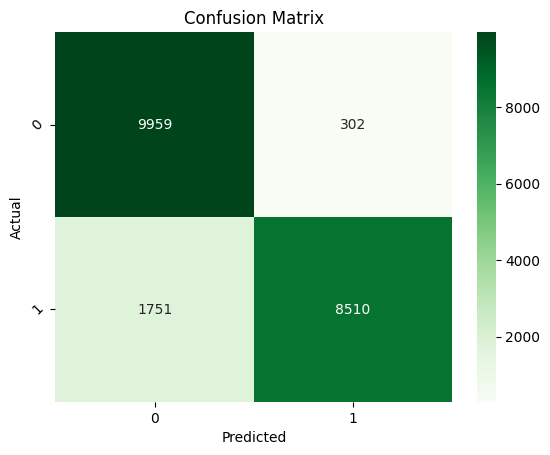

In [100]:
#Result (Confusion Matric)
target_names = ['0','1']

import seaborn as sn
from sklearn.metrics import confusion_matrix
confusion_mtx = confusion_matrix(y_test_balanced, y_predict)

ax = plt.axes()
sn.heatmap(confusion_mtx, annot=True,ax=ax, cmap=plt.cm.Greens,fmt="d")
ax.set_title('Confusion Matrix')
ax.set_xticklabels(target_names)
ax.set_yticklabels(target_names,rotation = 45)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [101]:
from sklearn.metrics import classification_report

In [102]:
print(classification_report(y_test_balanced, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91     10261
           1       0.97      0.83      0.89     10261

    accuracy                           0.90     20522
   macro avg       0.91      0.90      0.90     20522
weighted avg       0.91      0.90      0.90     20522



As seen from the above evaluation metrics, the recall value of label 1 is quite low compared to the other evaluations, which is 0.83. Recall is the number of correct predictions against the original data or simply how many of the 1/YES/risk samples are correctly predicted. This can still happen even though we have balanced the dataset with SMOTE, but of course, because the dataset was synthesized, we cannot expect much. In the confusion matrix, the value that should be 1, but predicted as 0 (False Negative), is quite high, with 1786 samples. However, the precision value is very high, which is 0.97, meaning that many of the 0 predictions are correct. Overall, the model has a fairly high f1-score value, indicating that the model is good enough in predicting.

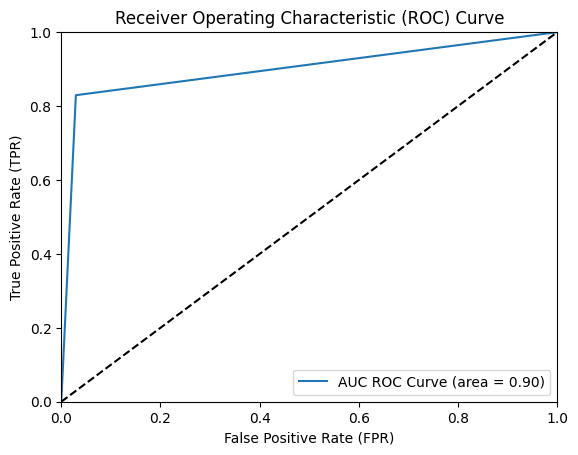

In [103]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Hitung skor AUC ROC
auc_roc_score = roc_auc_score(y_test_balanced, y_predict)

# Hitung nilai false positive rate (FPR), true positive rate (TPR) dan threshold
fpr, tpr, thresholds = roc_curve(y_test_balanced, y_predict)

# Gambar AUC ROC Curve
plt.plot(fpr, tpr, label='AUC ROC Curve (area = %0.2f)' % auc_roc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Then, as seen in the above ROC Curve, the AUC value is 0.9, which is quite high, indicating that the model is good enough in separating label 0 and label 1 because its value is close to 1. If it is closer to 0.5, the model cannot differentiate (random//unlearned), and if it is closer to 0, the model predicts the opposite, 0 as 1, and 1 as 0. This can happen because by calculating the AUC where the AUC (area under the curve) will have a value of 1 if TPR and FPR are both equal to 1 because the area is a square.